**Proyecto de Análisis de Ventas**

In [1]:
# Importar bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar el archivo CSV
df = pd.read_csv("ventas_productos.csv")  # Asegúrate de colocar la ruta correcta

# Visualizar las primeras filas
df.head()

,ID_Venta,Fecha,Producto,Categoría,Cantidad,Precio_Unitario,Total_Venta,Método_Pago,Cliente_Nuevo,Región
0,1,2023-12-22,Laptop,Accesorios,2,293.34,586.68,Tarjeta,No,Oeste
1,2,2023-08-13,Monitor,Hogar,9,284.71,2562.39,Efectivo,No,Este
2,3,2023-01-21,Smartphone,Oficina,1,802.83,802.83,Tarjeta,Sí,Oeste
3,4,2024-01-01,Cámara,Hogar,9,722.99,6506.91,Efectivo,Sí,Sur
4,5,2023-09-16,Teclado,Oficina,5,954.53,4772.65,Efectivo,No,Sur


**Análisis Exploratorio de Datos (EDA)**

In [4]:
#Verificar la estructura de los datos

df.info()
df.describe()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID_Venta         1000 non-null   int64  
 1   Fecha            1000 non-null   object 
 2   Producto         1000 non-null   object 
 3   Categoría        1000 non-null   object 
 4   Cantidad         1000 non-null   int64  
 5   Precio_Unitario  1000 non-null   float64
 6   Total_Venta      1000 non-null   float64
 7   Método_Pago      1000 non-null   object 
 8   Cliente_Nuevo    1000 non-null   object 
 9   Región           1000 non-null   object 
dtypes: float64(2), int64(2), object(6)
memory usage: 78.3+ KB


,0
ID_Venta,0
Fecha,0
Producto,0
Categoría,0
Cantidad,0
Precio_Unitario,0
Total_Venta,0
Método_Pago,0
Cliente_Nuevo,0
Región,0


In [9]:
# Análisis de ventas en el tiempo
df['Fecha'] = pd.to_datetime(df['Fecha'])   #Convertir a formato fecha
df['Mes'] = df['Fecha'].dt.month   # Extraer el mes
df['Año'] = df['Fecha'].dt.year   # Extraer el año
df


,ID_Venta,Fecha,Producto,Categoría,Cantidad,Precio_Unitario,Total_Venta,Método_Pago,Cliente_Nuevo,Región,Mes,Año
0,1,2023-12-22,Laptop,Accesorios,2,293.34,586.68,Tarjeta,No,Oeste,12,2023
1,2,2023-08-13,Monitor,Hogar,9,284.71,2562.39,Efectivo,No,Este,8,2023
2,3,2023-01-21,Smartphone,Oficina,1,802.83,802.83,Tarjeta,Sí,Oeste,1,2023
3,4,2024-01-01,Cámara,Hogar,9,722.99,6506.91,Efectivo,Sí,Sur,1,2024
4,5,2023-09-16,Teclado,Oficina,5,954.53,4772.65,Efectivo,No,Sur,9,2023
...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,2023-01-17,Cámara,Accesorios,2,273.13,546.26,Transferencia,No,Oeste,1,2023
996,997,2023-01-23,Smartphone,Electrónica,4,17.33,69.32,Transferencia,No,Norte,1,2023
997,998,2023-07-13,Monitor,Hogar,3,695.29,2085.87,Transferencia,Sí,Oeste,7,2023
998,999,2023-10-25,Impresora,Electrónica,9,920.33,8282.97,Efectivo,No,Este,10,2023


<ipython-input-14-c7e767115ff6>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=venta_por_mes.index,y=venta_por_mes.values,palette="Blues")


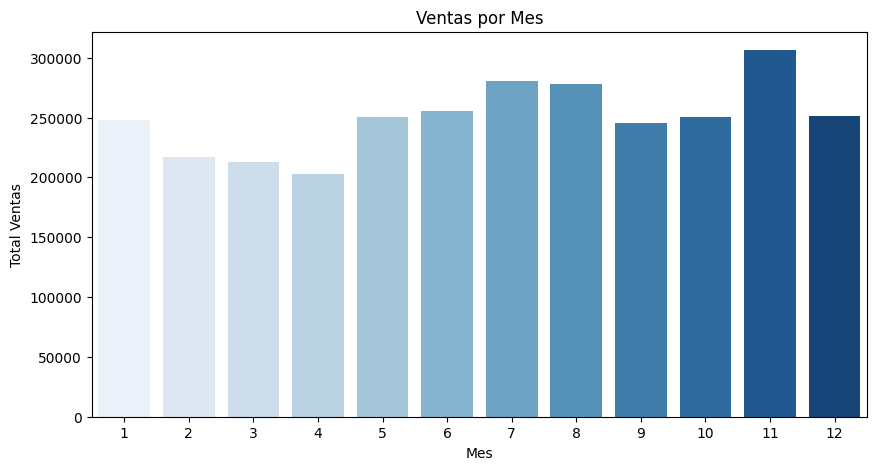

In [14]:
# Ventas por mes
venta_por_mes = df.groupby(['Mes'])['Total_Venta'].sum()
venta_por_mes
plt.figure(figsize=(10,5))
sns.barplot(x=venta_por_mes.index,y=venta_por_mes.values,palette="Blues")
plt.title("Ventas por Mes")
plt.xlabel("Mes")
plt.ylabel("Total Ventas")
plt.show()

<ipython-input-21-7ceb6992fdaa>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=producto_mas_vendido.index,y=producto_mas_vendido.values,palette="viridis")


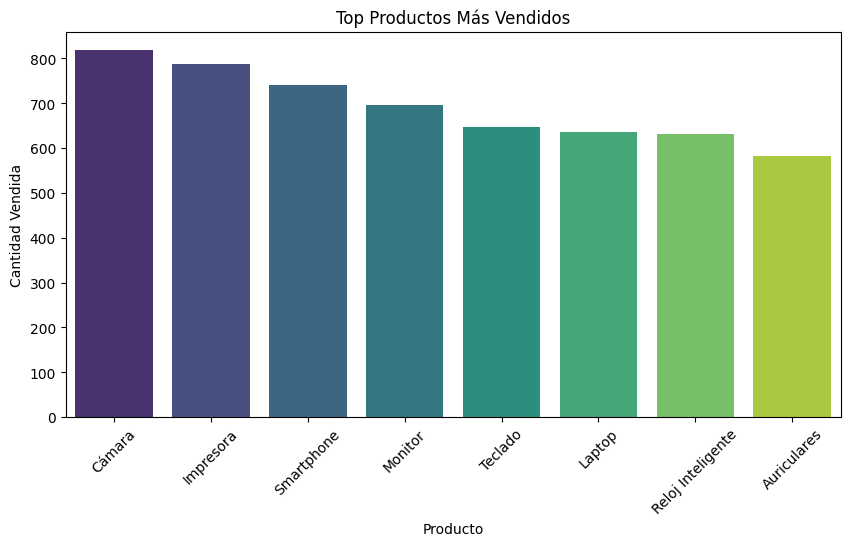

In [21]:
#Productos más vendidos, ordenado
producto_mas_vendido = df.groupby(['Producto'])['Cantidad'].sum()
producto_mas_vendido = producto_mas_vendido.sort_values(ascending=False)
producto_mas_vendido

plt.figure(figsize=(10,5))
sns.barplot(x=producto_mas_vendido.index,y=producto_mas_vendido.values,palette="viridis")
plt.xticks(rotation=45)
plt.title("Top Productos Más Vendidos")
plt.xlabel("Producto")
plt.ylabel("Cantidad Vendida")
plt.show()


In [46]:
#Análisis de Métodos de Pago
tipos_metodo_pago = df['Método_Pago'].unique()
tipos_metodo_pago   #Resultado:        array(['Tarjeta', 'Efectivo', 'Transferencia'], dtype=object)

#Cuantas personas pagaron por ['Tarjeta', 'Efectivo', 'Transferencia'] respectivamente ?

#via 1
df_pago_tarjeta = df[df['Método_Pago'] == 'Tarjeta']
df_pago_tarjeta.shape[0]

#via 2
pago_metodo = df['Método_Pago'].value_counts()
pago_tarjeta = pago_metodo.get('Tarjeta',0)
#pago_tarjeta 348
pago_efectico = pago_metodo.get('Efectivo',0)
#pago_efectico  295
pago_transferencia = pago_metodo.get('Transferencia',0)
#pago_transferencia   357

357

In [50]:
#Que metodo de pago recaudo mas dinero

venta_por_metodo_pago = df.groupby(['Método_Pago'])['Total_Venta'].sum()
venta_por_metodo_pago = venta_por_metodo_pago.sort_values(ascending=False)
venta_por_metodo_pago

,Total_Venta
Método_Pago,
Tarjeta,1116494.43
Transferencia,1084873.72
Efectivo,796396.95


<ipython-input-55-ff494c7f20ea>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=ventas_por_region.index, y=ventas_por_region.values, palette="coolwarm")


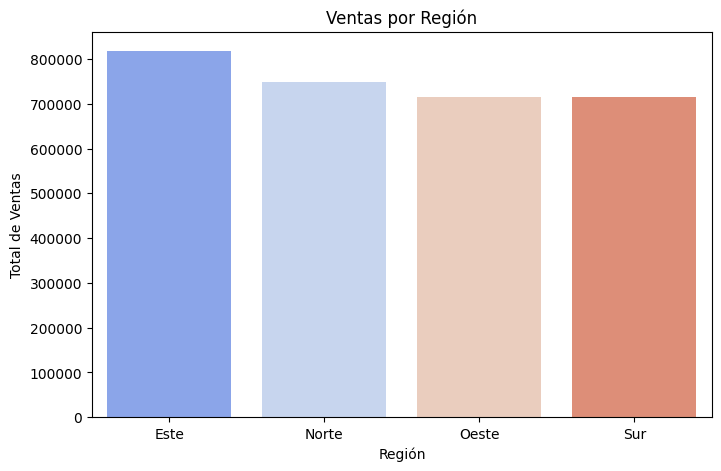

In [55]:
#Cual serian las ventas por region,
#Primero indicar cual seria las regiones donde se venden

regiones = df['Región'].unique()   #array(['Oeste', 'Este', 'Sur', 'Norte'], dtype=object)


ventas_por_region = df.groupby(['Región'])['Total_Venta'].sum()



plt.figure(figsize=(8, 5))
sns.barplot(x=ventas_por_region.index, y=ventas_por_region.values, palette="coolwarm")
plt.title("Ventas por Región")
plt.xlabel("Región")
plt.ylabel("Total de Ventas")
plt.show()